In [1]:
# 2013/01~2015/10(34ヶ月)　売り上げ情報整理
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# データ読み込み
train = pd.read_csv('sales_train_v2.csv')
#　日にちアイテムごとの売り上げ個数と金額を算出
train['sales_day'] = train['item_price'] * train['item_cnt_day']
# 月ごとの計算 date_block_num:月ごとに振られている
# アイテム数
tsi_month = train.groupby('date_block_num', as_index = False)['item_cnt_day'].sum()
# dateでうまくソートできないため、date_block_numで一旦ソート
tsi_day_temp = train.groupby(['date_block_num','date'], as_index = False)['item_cnt_day'].sum()
tsi_day = pd.DataFrame()
tsi_day['item_cnt_day'] = tsi_day_temp['item_cnt_day']
tsi_day.index = pd.date_range('2013-01-01',periods=1034,freq='d')
# 金額
ts_month = train.groupby('date_block_num', as_index = False)['sales_day'].sum()
# dateでうまくソートできないため、date_block_numで一旦ソート
ts_day_temp = train.groupby(['date_block_num','date'], as_index = False)['sales_day'].sum()
ts_day = pd.DataFrame()
ts_day['sales_day'] = ts_day_temp['sales_day']
ts_day.index = pd.date_range('2013-01-01',periods=1034,freq='d')
# 今回調査する売り上げ金額のデータ確認
print(ts_day)

             sales_day
2013-01-01  1362942.00
2013-01-02  6020512.03
2013-01-03  5436480.11
2013-01-04  4755664.00
2013-01-05  4587231.00
2013-01-06  4272597.00
2013-01-07  3376752.23
2013-01-08  3371345.00
2013-01-09  2209876.00
2013-01-10  2295337.50
2013-01-11  2863546.60
2013-01-12  3621355.00
2013-01-13  3065622.56
2013-01-14  1976551.40
2013-01-15  2524567.50
2013-01-16  2320340.00
2013-01-17  2252300.00
2013-01-18  2653934.60
2013-01-19  4120716.00
2013-01-20  3559061.00
2013-01-21  1928464.00
2013-01-22  1911414.00
2013-01-23  1805894.20
2013-01-24  1996535.78
2013-01-25  2754354.87
2013-01-26  4011690.50
2013-01-27  3326219.90
2013-01-28  1775387.20
2013-01-29  1906806.00
2013-01-30  1970727.00
...                ...
2015-10-02  3920791.00
2015-10-03  5767587.00
2015-10-04  4661264.00
2015-10-05  1639808.55
2015-10-06  1339565.10
2015-10-07  2800207.55
2015-10-08  2016981.90
2015-10-09  2204254.60
2015-10-10  3141861.20
2015-10-11  2648088.55
2015-10-12  1585838.00
2015-10-13 

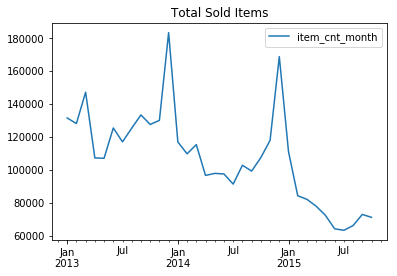

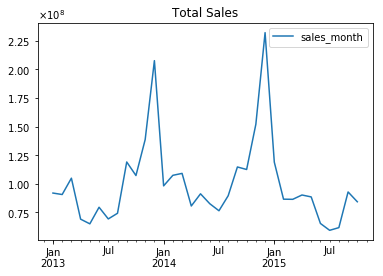

In [2]:
# グラフの書式設定
# 年月ラベル
x = pd.date_range('2013-01-01',periods=34,freq='m')

# 月次の売り上げアイテム数のグラフ
out_tsi_month = tsi_month.rename(columns = {'item_cnt_day' : 'item_cnt_month'})
out_tsi_month.plot.line(x, y = 'item_cnt_month')
plt.title('Total Sold Items')
plt.savefig('./img/tsi_month.png')
plt.show()

# 月次の売り上げ金額のグラフ
out_ts_month = ts_month.rename(columns = {'sales_day' : 'sales_month'})
out_ts_month.plot.line(x, y = 'sales_month')
# Y軸の数字を１０のべき乗で表現する
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
plt.title('Total Sales')
plt.savefig('./img/ts_month.png')
plt.show()

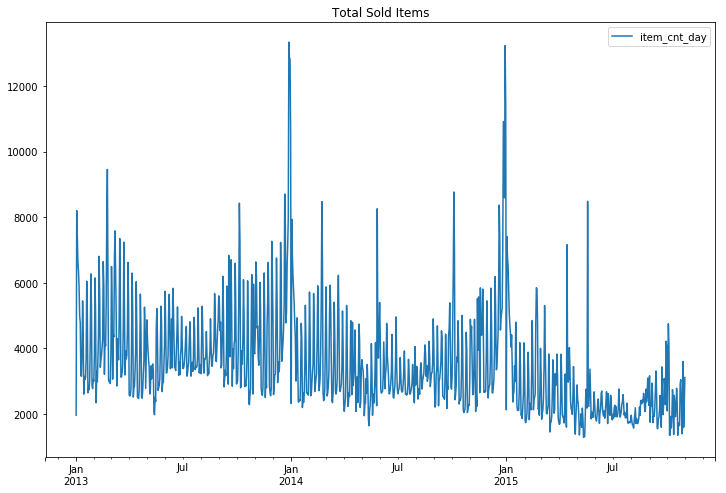

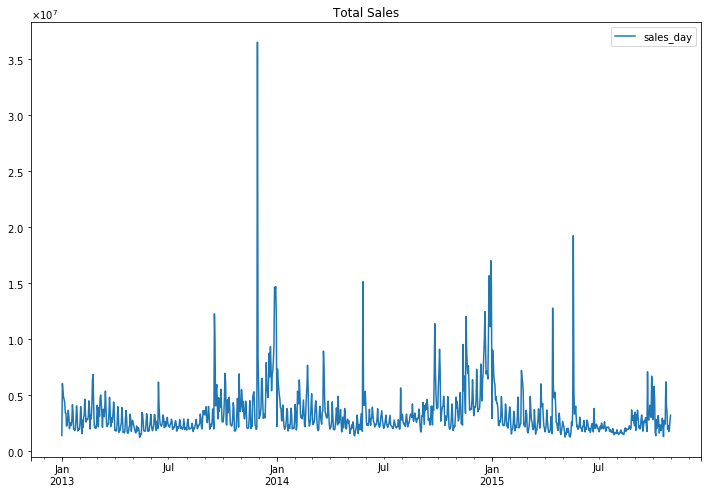

In [13]:
# 日次の売り上げアイテム数のグラフ
tsi_day.plot(figsize=(12,8))
plt.title('Total Sold Items')
plt.savefig('./img/tsi_day.png')
plt.show()

# 日次の売り上げ金額のグラフ
ts_day.plot(figsize=(12,8))
# Y軸の数字を１０のべき乗で表現する
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().ticklabel_format(style="sci",axis="y",scilimits=(0,0))
plt.title('Total Sales')
plt.savefig('./img/ts_day.png')
plt.show()

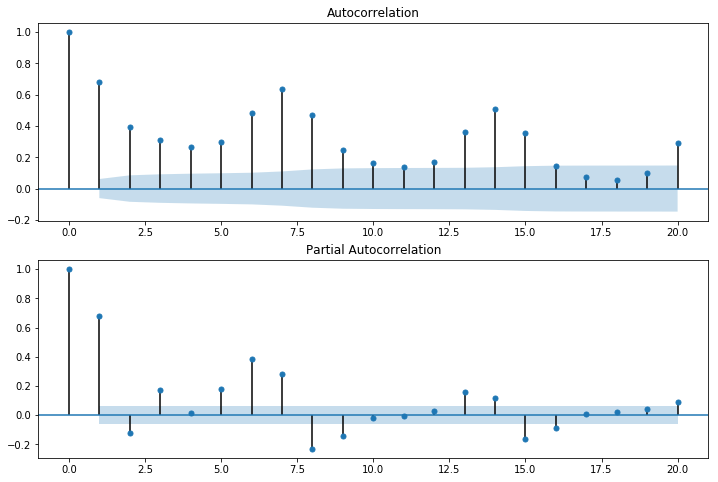

In [14]:
# 日次データ　売り上げ個数
# 自己相関（Autocorrelation）プロット
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(tsi_day['item_cnt_day'], lags=20, ax=ax1)
fig.savefig('./img/acf_tsi_day.png')

# 偏自己相関（Partial Autocorrelation）プロット
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(tsi_day['item_cnt_day'], lags=20, ax=ax2)
fig.savefig('./img/pacf_tsi_day.png')

In [4]:
# 売り上げ個数
from statsmodels.tsa import stattools as st

# ARMAモデルの次数を決める
st.arma_order_select_ic(tsi_day, ic='aic')


/Users/yuki-t/.pyenv/versions/anaconda3-5.0.0/envs/py35/lib/python3.5/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/yuki-t/.pyenv/versions/anaconda3-5.0.0/envs/py35/lib/python3.5/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/Users/yuki-t/.pyenv/versions/anaconda3-5.0.0/envs/py35/lib/python3.5/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensi

{'aic':               0             1             2
 0  18174.683062  17623.615317  17547.978672
 1  17538.589356  17510.042508  17433.110481
 2  17523.767618  17500.983875  17430.229851
 3  17492.277058  17425.630281  17323.585845
 4  17494.195483  17427.022402  17421.988176, 'aic_min_order': (3, 2)}

/Users/yuki-t/.pyenv/versions/anaconda3-5.0.0/envs/py35/lib/python3.5/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/yuki-t/.pyenv/versions/anaconda3-5.0.0/envs/py35/lib/python3.5/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/Users/yuki-t/.pyenv/versions/anaconda3-5.0.0/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/yuki-t/.pyenv/versions/anaconda3-5.0.

2015/11月の予想売り上げ個数： 104384.02243520528


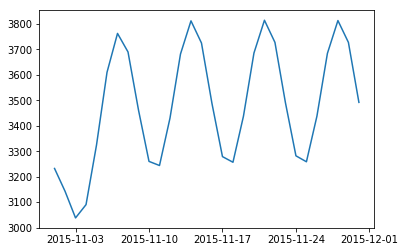

In [10]:
from statsmodels.tsa.arima_model import ARMA
arma_tsi  = ARMA(tsi_day,order=[3,2]).fit(maxlags=1, ic='aic')
#予測
arma_tsi_predict = arma_tsi.predict('2015-11-01','2015-11-30')

#プロット
plt.plot(arma_tsi_predict)
plt.savefig('./img/sales_items_201511.png')

# 月合計の売り上げ個数
print("2015/11月の予想売り上げ個数：",sum(arma_tsi_predict))
# 月の売り上げ個数は上がる様子　104384.02243520528


In [60]:
# 日次データ　売り上げ個数
# ARMAモデルの評価
print (arma_tsi.summary())

                              ARMA Model Results                              
Dep. Variable:           item_cnt_day   No. Observations:                 1034
Model:                     ARMA(3, 2)   Log Likelihood               -8654.793
Method:                       css-mle   S.D. of innovations           1042.439
Date:                Sun, 27 Jan 2019   AIC                          17323.586
Time:                        00:04:35   BIC                          17358.174
Sample:                    01-01-2013   HQIC                         17336.710
                         - 10-31-2015                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               3528.2384    103.783     33.996      0.000    3324.828    3731.648
ar.L1.item_cnt_day     1.9404      0.023     84.617      0.000       1.895       1.985
ar.L2.item_cnt_day  

/Users/yuki-t/.pyenv/versions/anaconda3-5.0.0/envs/py35/lib/python3.5/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


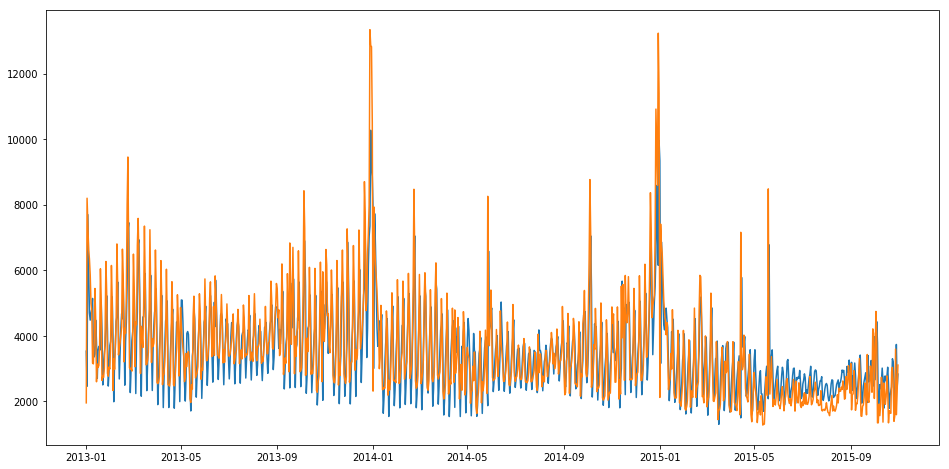

In [11]:
# 日次データ　売り上げ個数
# テスト値がないのでモデルの理論値と学習用データで比較
#予測
arma_tsi_pre = arma_tsi.predict('2013-01-01','2015-10-31')

#プロット
plt.figure(figsize=(16,8))
plt.plot(arma_tsi_pre)
plt.plot(tsi_day)
plt.savefig('./img/sales_items_comp.png')

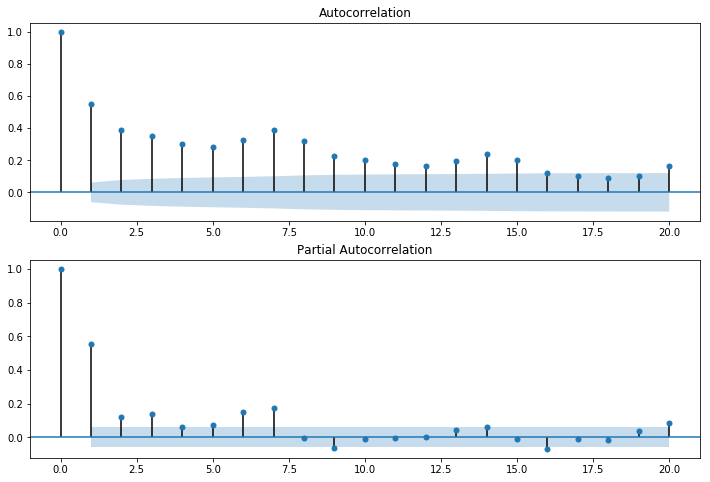

In [15]:
# 日次データ　売り上げ金額
# 自己相関（Autocorrelation）プロット
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_day['sales_day'], lags=20, ax=ax1)
fig.savefig('./img/acf_ts_day.png')
# 偏自己相関（Partial Autocorrelation）プロット
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_day['sales_day'], lags=20, ax=ax2)
fig.savefig('./img/pacf_ts_day.png')

In [40]:
from statsmodels.tsa import stattools as st


# ARMAモデルの次数を決める
st.arma_order_select_ic(ts_day, ic='aic')

/Users/yuki-t/.pyenv/versions/anaconda3-5.0.0/envs/py35/lib/python3.5/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/yuki-t/.pyenv/versions/anaconda3-5.0.0/envs/py35/lib/python3.5/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/Users/yuki-t/.pyenv/versions/anaconda3-5.0.0/envs/py35/lib/python3.5/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensi

{'aic':               0             1             2
 0  33191.558351  32924.497199  32873.163775
 1  32818.155295  32789.863383  32757.635489
 2  32805.183324  32758.693096  32759.139225
 3  32787.973557  32759.206313  32757.837334
 4  32785.957883  32761.205470  32758.890286, 'aic_min_order': (1, 2)}

/Users/yuki-t/.pyenv/versions/anaconda3-5.0.0/envs/py35/lib/python3.5/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/yuki-t/.pyenv/versions/anaconda3-5.0.0/envs/py35/lib/python3.5/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/Users/yuki-t/.pyenv/versions/anaconda3-5.0.0/envs/py35/lib/python3.5/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtyp

2015/11月の予想売り上げ金額： 92245706.9785957


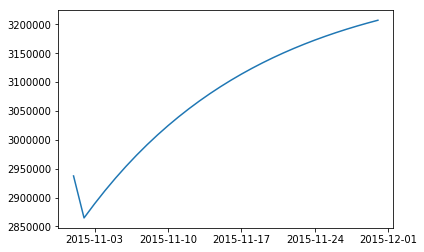

In [8]:
from statsmodels.tsa.arima_model import ARMA
arma_ts  = ARMA(ts_day,order=[1,2]).fit(maxlags=1, ic='aic')
#予測
arma_ts_predict = arma_ts.predict('2015-11-01','2015-11-30')

#プロット
plt.plot(arma_ts_predict)
plt.savefig('./img/sales_201511.png')

# 月合計の売り上げ金額
print("2015/11月の予想売り上げ金額：",sum(arma_ts_predict))
# 月の売り上げは上がる様子　92245706.9785957


In [9]:
# 日次データ　売り上げ金額
# ARMAモデルの評価
print (arma_ts.summary())

                              ARMA Model Results                              
Dep. Variable:              sales_day   No. Observations:                 1034
Model:                     ARMA(1, 2)   Log Likelihood              -16373.818
Method:                       css-mle   S.D. of innovations        1823337.885
Date:                Sun, 27 Jan 2019   AIC                          32757.635
Time:                        19:15:52   BIC                          32782.341
Sample:                    01-01-2013   HQIC                         32767.010
                         - 10-31-2015                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3.287e+06    2.7e+05     12.190      0.000    2.76e+06    3.82e+06
ar.L1.sales_day     0.9424      0.017     54.264      0.000       0.908       0.976
ma.L1.sales_day    -0.5150      

/Users/yuki-t/.pyenv/versions/anaconda3-5.0.0/envs/py35/lib/python3.5/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/yuki-t/.pyenv/versions/anaconda3-5.0.0/envs/py35/lib/python3.5/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


/Users/yuki-t/.pyenv/versions/anaconda3-5.0.0/envs/py35/lib/python3.5/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


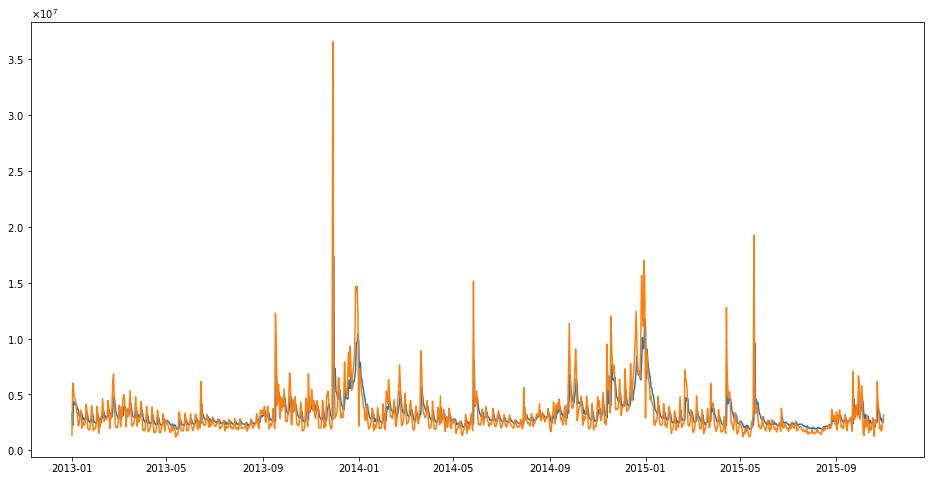

In [16]:
# 日次データ　売り上げ金額
# テスト値がないのでモデルの理論値と学習用データで比較
#予測
arma_ts_pre = arma_ts.predict('2013-01-01','2015-10-31')

#プロット
plt.figure(figsize=(16,8))
plt.plot(arma_ts_pre)
plt.plot(ts_day)
# Y軸の数字を１０のべき乗で表現する
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().ticklabel_format(style="sci",axis="y",scilimits=(0,0))
plt.savefig('./img/sales_comp.png')